<a href="https://colab.research.google.com/github/dorotacn/Kaggle_computer_vision_XM/blob/main/Kaggle_Computer_Vision_XM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LOAD LIBRARIES
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

#CONNECT TO KAGGLE

**Install the Kaggle API client.**
!pip install kaggle==1.5.12

**Upload your Kaggle API key.**
   1. Go to your Kaggle account page and click "Create New API Token".
   2. This will download a file named "kaggle.json".
   3. In Colab, click on the folder icon on the left sidebar.
   4. Click on "Upload to session storage" and upload the "kaggle.json" file.

**Configure the Kaggle API client**
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

**Download the dataset**
!kaggle datasets download -d amandam1/healthy-vs-diseased-leaf-image-dataset --unzip

**Reasoning:**
**Install Kaggle API client**: We use !pip install kaggle==1.5.12 to install a specific version of the Kaggle API client, which ensures compatibility.
Upload Kaggle API key: You need to provide your Kaggle API key for authentication. The steps describe how to obtain and upload your kaggle.json file, which contains your API key.
**Configure Kaggle API client**: The os.environ line sets the environment variable KAGGLE_CONFIG_DIR to point to the location where you uploaded your kaggle.json file.
**Download dataset:**
 !kaggle datasets download -d amandam1/healthy-vs-diseased-leaf-image-dataset --unzip uses the Kaggle API to download the specified dataset with the --unzip flag to automatically extract the downloaded archive.



In [ ]:
!pip install kaggle

In [2]:
#Configure the Kaggle API client
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

#DOWNLOAD DATA TO COLAB ENVIROMENT

In [3]:
!kaggle competitions download -c computer-vision-xm

100% 6.20G/6.20G [04:31<00:00, 23.9MB/s]
100% 6.20G/6.20G [04:31<00:00, 24.6MB/s]


Python also provides a high-level module called zipfile specifically designed to create, read, write, extract, and list the content of ZIP files.
n the zipfile module, you’ll find the ZipFile class. This class works pretty much like Python’s built-in open() function, allowing you to open your ZIP files using different modes. The read mode ("r") is the default. You can also use the write ("w"), append ("a"), and exclusive ("x") modes. You’ll learn more about each of these in a moment.ZipFile implements the context manager protocol so that you can use the class in a with statement. This feature allows you to quickly open and work with a ZIP file without worrying about closing the file after you finish your work.

In [ ]:
#check what files you have in zipped file
import zipfile
with zipfile.ZipFile("/content/computer-vision-xm.zip", mode="r") as archive:
  #he archive variable now holds the instance of ZipFile itself.
  #printdir() provides a quick way to display the content of the underlying ZIP file
  archive.printdir()

In [ ]:
'''#EXTRACT FILES
Extracting the content of a given archive is one of the most common operations that you’ll do on ZIP files. Depending on your needs,
 you may want to extract a single file at a time or all the files in one go.
 ZipFile.extract() allows you to accomplish the first task.
 This method takes the name of a member file and extracts it to a given directory signaled by path.
 The destination path defaults to the current directory:

import zipfile
#extract just one memeber of the zip file,
#in this case zip file is sample.zim, you extract only new_hello.txt
with zipfile.ZipFile("sample.zip", mode="r") as archive:
  archive.extract("new_hello.txt", path="output_dir/")
#extract all files witin zip file
#.extractall(). As its name implies, this method extracts all the member files
#to a destination path, which is the current directory by default

import zipfile

with zipfile.ZipFile("sample.zip", mode="r") as archive:
  archive.extractall("output_dir/")#if you do not provide directory where you want files to be extracted , it will extract to current dir

'''


In [4]:
#EXTRACT FILES
import zipfile
with zipfile.ZipFile("/content/computer-vision-xm.zip", mode="r") as archive:
  archive.extractall()

In [5]:
#CHECK CONTNT OF THE TRAIN FILE
import pandas as pd
train_df = pd.read_csv("/content/train.csv")
train_df.head()

,Unnamed: 0,Images,Labels
0,0,0003_0074.JPG,0
1,1,0004_0182.JPG,0
2,2,0018_0063.JPG,1
3,3,0009_0284.JPG,0
4,4,0020_0071.JPG,1


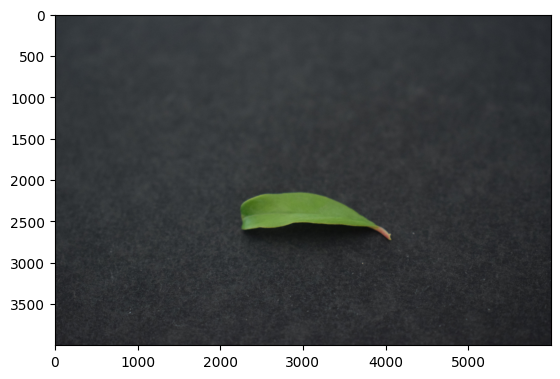

In [6]:
#show firt image from the train table
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/images/kaggle/working/Reorganized_Data/images/0009_0284.JPG')
plt.imshow(img)

In [ ]:
#CHECK CONTNT OF THE TEST FILE- I will be predicting on this one!!
import pandas as pd
test_df = pd.read_csv("/content/test.csv")
test_df.head()

In [ ]:
#show firt image from the test table
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/images/kaggle/working/Reorganized_Data/images/0011_0100.JPG')
plt.imshow(img)

In [ ]:
#CHECK CONTNT OF THE TEST FILE- this one is just a smaple, not needed
import pandas as pd
sample_submission_df = pd.read_csv("/content/sample_submission.csv")
sample_submission_df.head()

# LOAD DATA WHERE IMAGES ARE LABELS ARE IN SEPERATE FILES
here's how you can load training data when images are in a separate directory and labels/filenames are in a CSV file, using tensorflow:
1. **Create a function to load and preprocess images**:
import tensorflow as tf
import pandas as pd
def load_and_preprocess_image(image_path, label):
  *  **'''Loads an image from a file, preprocesses it, and returns the image and label'''.**

    * image = tf.io.read_file(image_path)
    * image = tf.image.decode_jpeg(image, channels=3)  # Assuming JPEG images
    * image = tf.image.resize(image, [224, 224])  # Resize to your desired size
    * image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values

    * return image, label
  
* tf.io.read_file: Reads the image file from the given path.
* tf.image.decode_jpeg: Decodes the JPEG image into a tensor.
* tf.image.resize: Resizes the image to the desired dimensions.
* tf.cast and / 255.0: Normalizes the pixel values to the range [0, 1].

2. **Create a tf.data.Dataset**:

import pandas as pd
# Load the CSV file
df = pd.read_csv('/path/to/train.csv')

# Create a list of image paths and labels
* image_paths = ['/path/to/images/' + filename for filename in df ['image_filename'].tolist()]  # Assuming 'image_filename' column
* labels = df['label'].tolist()  # Assuming 'label' column

# Create the dataset
* dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
* dataset = dataset.map(load_and_preprocess_image)
* dataset = dataset.batch(32)  # Set your desired batch size


* pd.read_csv: Loads the CSV file containing image filenames and labels.
* tf.data.Dataset.from_tensor_slices: Creates a dataset from the image paths and labels.
* dataset.map: Applies the load_and_preprocess_image function to each element of the dataset.
* dataset.batch: Divides the dataset into batches of the specified size.
How it Works:
The CSV file is read, and lists of image paths and labels are created.
A tf.data.Dataset is created from these lists.
The load_and_preprocess_image function is applied to each element (image path and label) to load and preprocess the image.
The dataset is batched for efficient training.
Important Considerations:

Image paths: Adjust the image paths in the code to match the actual location of your images.
Column names: Make sure the column names in your CSV file (image_filename, label) are correct.
Data augmentation: If you want to perform data augmentation, you can add additional transformations using tf.image functions within the load_and_preprocess_image function.
I hope this helps you load your data using TensorFlow! Let me know if you have any other questions.






In [7]:
#CREATE FUNCTION TO LOAD AND PROCESS IMAGES
import tensorflow as tf
import pandas as pd

def load_and_preprocess_image(image_path, label):
    """Loads an image from a file, preprocesses it, and returns the image and label."""
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Assuming JPEG images
    image = tf.image.resize(image, [224, 224])  # Resize to your desired size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values

    return image, label

In [8]:
#CREATE A TF.DATA.DATASET
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/train.csv')

# Create a list of image paths and labels
base_path='/content/images/kaggle/working/Reorganized_Data/images/'
image_paths = [os.path.join(base_path + filename) for filename in df['Images'].tolist()]  # image' is column in df
labels = df['Labels'].tolist()  # 'Labels'is column in df with label 0 or 1

# Create the dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
dataset = dataset.map(load_and_preprocess_image)
dataset = dataset.batch(32)  # Set your desired batch size

In [9]:
#Prepare train and validation data set
import tensorflow as tf

# Assuming 'dataset' is already created as in your code
#dataset_size = len(list(dataset)) # Get the total number of elements in the dataset
dataset_size = len(df)
train_size = int(0.8 * dataset_size) # Calculate the size of the training set
val_size = dataset_size - train_size # Calculate the size of the validation set

# Split the dataset into training and validation sets using 'take' and 'skip'
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# BUILD AND TRAIN MODEL

In [10]:
num_classes = 1

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


#COMPILE MODEL
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         933,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 943,285 (3.60 MB)

 Trainable params: 943,285 (3.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 643s 6s/step - accuracy: 0.5282 - loss: 0.6967
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


106/106 ━━━━━━━━━━━━━━━━━━━━ 663s 6s/step - accuracy: 0.6700 - loss: 0.5707
Epoch 3/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 621s 6s/step - accuracy: 0.7652 - loss: 0.4678
Epoch 4/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 618s 6s/step - accuracy: 0.8128 - loss: 0.3767
Epoch 5/5
106/106 ━━━━━━━━━━━━━━━━━━━━ 616s 6s/step - accuracy: 0.8572 - loss: 0.3182


KeyError: 'val_accuracy'

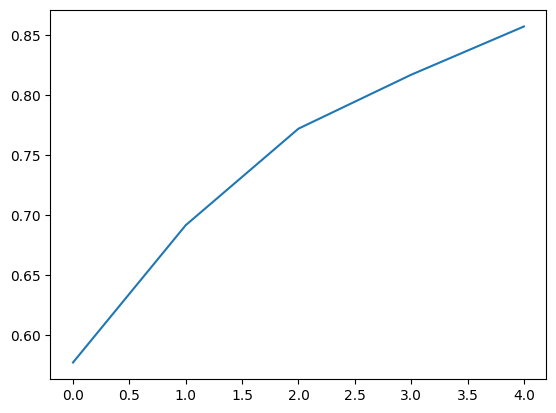

In [11]:

#TRAIN MODEL
epoch_hist= model.fit(train_dataset, validation_data=val_dataset, epochs=5)

#PLOT TRAINING CURVE
plt.plot(epoch_hist.history['accuracy'])


#MAKE PREDICTIONS ON TEST DATA

In [25]:
#CREATE FUNCTION TO LOAD AND PROCESS IMAGES
import tensorflow as tf
import pandas as pd

def load_and_preprocess_test_image(image_path):
    """Loads an image from a file, preprocesses it, and returns the image and label."""
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Assuming JPEG images
    image = tf.image.resize(image, [224, 224])  # Resize to your desired size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values

    return image

In [27]:

#CREATE A TF.DATA.DATASET
import pandas as pd

# Load the CSV file
df_test = pd.read_csv('/content/test.csv')

# Create a list of image paths and labels
base_path='/content/images/kaggle/working/Reorganized_Data/images/'
image_paths = [os.path.join(base_path + filename) for filename in df_test['Images'].tolist()]  # image' is column in df

# Create the dataset
dataset = tf.data.Dataset.from_tensor_slices((image_paths))
test_data = dataset.map(load_and_preprocess_test_image)
# Set your desired batch size


In [28]:
df.head()

,Unnamed: 0,Images
0,0,0011_0100.JPG
1,1,0009_0053.JPG
2,2,0009_0011.JPG
3,3,0009_0252.JPG
4,4,0011_0096.JPG


tf.Tensor(
[[[0.13781512 0.15350139 0.15742296]
  [0.13783512 0.15352139 0.15744296]
  [0.15246098 0.15246098 0.15246098]
  ...
  [0.12092743 0.1366137  0.14053527]
  [0.10679764 0.12248392 0.12640548]
  [0.10388218 0.11956845 0.13133316]]

 [[0.13263305 0.14831932 0.15224089]
  [0.12873147 0.14441775 0.14833932]
  [0.15294118 0.15294118 0.15294118]
  ...
  [0.11636468 0.13205095 0.13597251]
  [0.11350091 0.12918718 0.13310875]
  [0.10588235 0.12156863 0.1254902 ]]

 [[0.11864748 0.13433376 0.13825533]
  [0.13713484 0.15282111 0.15674268]
  [0.1167867  0.13247298 0.12855141]
  ...
  [0.10376291 0.11944918 0.12337075]
  [0.10798182 0.12366809 0.12758966]
  [0.09803922 0.11372549 0.11764706]]

 ...

 [[0.10042044 0.0925773  0.10434201]
  [0.10338137 0.09553824 0.10730294]
  [0.10166074 0.10166074 0.10950388]
  ...
  [0.07843138 0.07058824 0.08235294]
  [0.0827328  0.07488967 0.08665437]
  [0.0627451  0.0627451  0.07058824]]

 [[0.08305295 0.07520981 0.08697452]
  [0.12012842 0.11228528 0

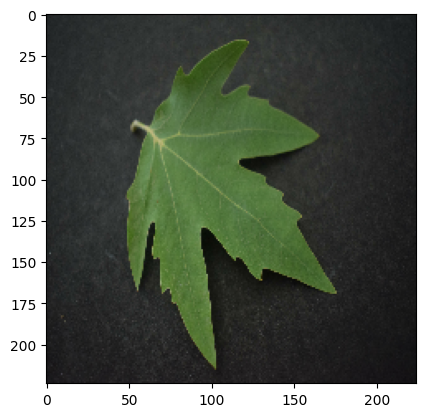

In [30]:
#check test data
for image in test_data:
  print(image)
  plt.imshow(image)
  break

In [32]:
#MAKE PREDICTION ON TEST DATA
'''By using test_data.batch(1), you are grouping the individual images
from your test_data dataset into batches of size 1.
This adds the necessary batch dimension to the input tensors,
making them compatible with the model's expected input shape
'''
predictions = model.predict(test_data.batch(1))

848/848 ━━━━━━━━━━━━━━━━━━━━ 86s 100ms/step


In [36]:
predictions_class=[1 if p>0.5 else 0 for p in predictions]


In [40]:
predictions_class[:10]
#turn predictions_class into df with column names 'Labels'
predictions_df = pd.DataFrame(predictions_class, columns=['Labels'])
predictions_df.head(2)

,Labels
0,0
1,0


In [44]:
#CONCATENATE TEST DF AND PREDICITONS CLASS DF AND CREATE SUBMISSIONS FILE

submission_df = pd.concat([df, predictions_df], axis=1)
submission_df.head()
#drop Unnamd:0 column
submission_df = submission_df.drop(columns=['Unnamed: 0'])
submission_df.head()
#save to csv
submission_df.to_csv('submission.csv', index=False)

In [38]:
3#import submissin sample file
sub_df=pd.read_csv('/content/sample_submission.csv')
sub_df.head()

,Images,Labels
0,0011_0100.JPG,0
1,0009_0053.JPG,0
2,0009_0011.JPG,0
3,0009_0252.JPG,0
4,0011_0096.JPG,0
